In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('data_train.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Automated EDA

In [6]:
#!pip3 install pandas-profiling 

import pandas_profiling  as pf

pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual EDA

In [7]:
df.shape

(10683, 11)

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# removing NaN values from the dataset

df.dropna(how='any', inplace = True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.duplicated().sum()

220

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

### Featrue Engineering

Converting **Date_of_Journey** to a **datetime** format, and create new columns with **date** and **month**

In [14]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [15]:
# Date of Journey

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month
df['Year_of_Journey'] = (df['Date_of_Journey']).dt.year

In [16]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019


In [17]:
df['Year_of_Journey'].unique()

array([2019])

In [18]:
df.drop(['Date_of_Journey'], axis = 1, inplace = True)

Doing the same with other relative columns

In [19]:
# Departure time

df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [20]:
df.drop(['Dep_Time'], axis =1, inplace = True)

In [21]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [22]:
# Arrival time

df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [23]:
df.drop(['Arrival_Time'], axis =1, inplace = True)

In [24]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [25]:
# Duration time

duration = df['Duration'].str.split(' ', expand = True)

In [26]:
duration[1].fillna('00m', inplace = True)
duration.head(3)

,0,1
0,2h,50m
1,7h,25m
2,19h,00m


In [27]:
df['duration_hr'] = duration[0].apply(lambda x: x[:-1])
df['duration_min'] = duration[1].apply(lambda x: x[:-1])

In [28]:
df.drop(['Duration'], axis = 1, inplace = True)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


### Visualisations

In [29]:
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

**Count of Airlines**

In [30]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Airline vs Price**

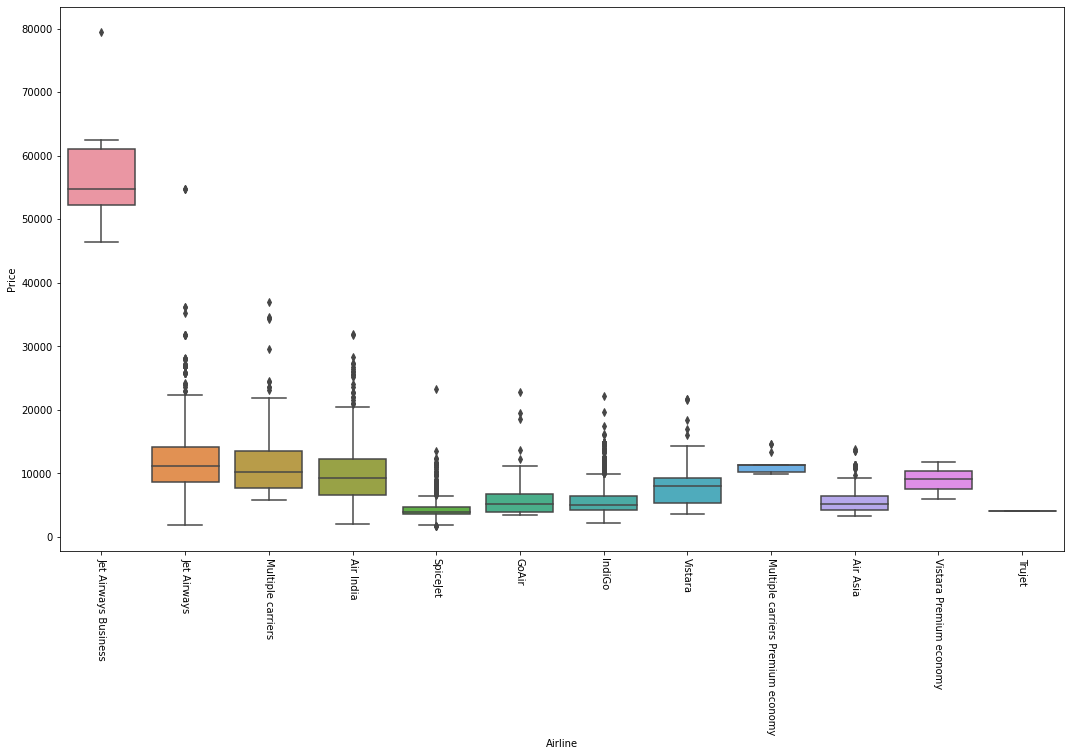

In [31]:
# Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending = False)
# plt.figure(figsize = (15,10))
# sns.barplot(Airprices.index, Airprices.values)
# plt.xticks(rotation = 270)

plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.xticks(rotation = 270)
plt.show()

**Insight:**

Jet Airways has the highest price, Trujet has the lowest price.

#### Price based on number of stops

In [32]:
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12146.860399
                                   3 stops        12339.057143
                                   4 stops        17686.000000
                                   non-stop        5600.552885
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4714.865963
Jet Airways                        1 stop         12512.741223
                                   2 stops        13548.313076
        

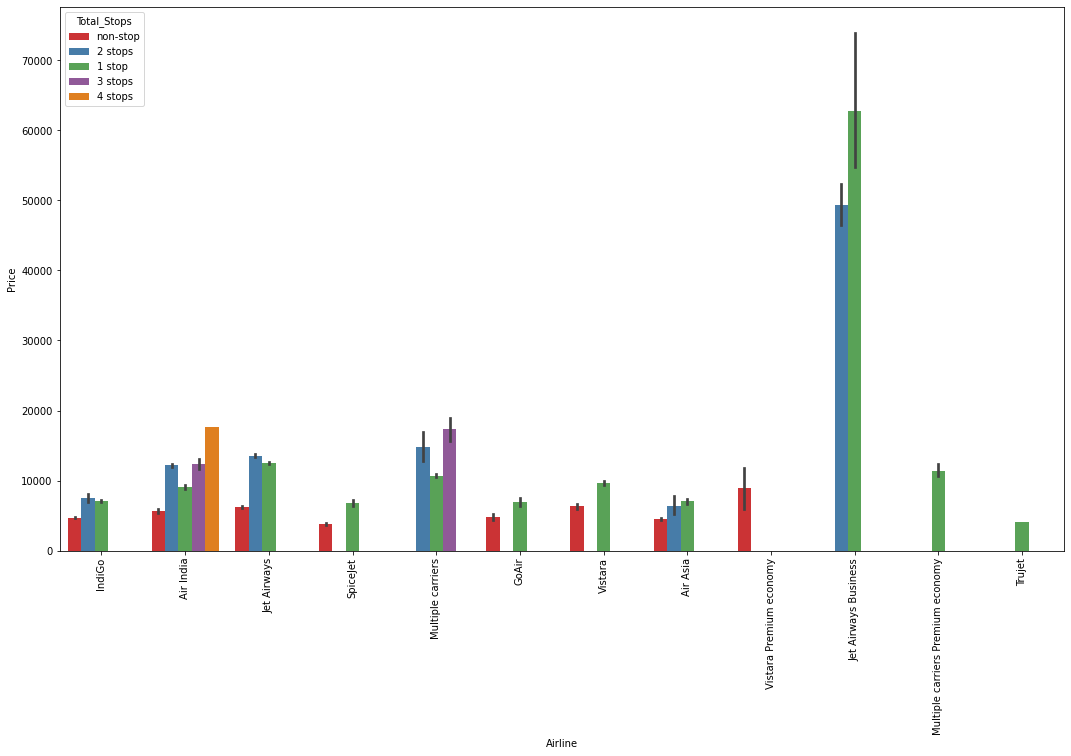

In [33]:
plt.figure(figsize = (18,10))
ax=sns.barplot(x=df['Airline'], y = df['Price'], hue = df['Total_Stops'], palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

# what are this black lines? 

**Insight**:

One stop and two stops of Jet Airways Business are having the highest price

**Source vs Price**

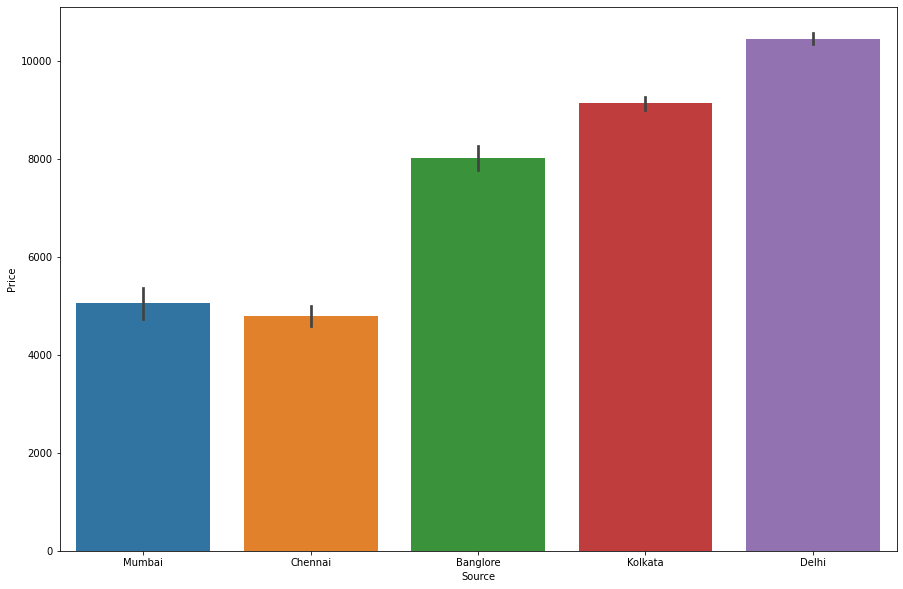

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'Price', x='Source', data = df.sort_values('Price', ascending = True))
plt.show()

**Destination vs Price**

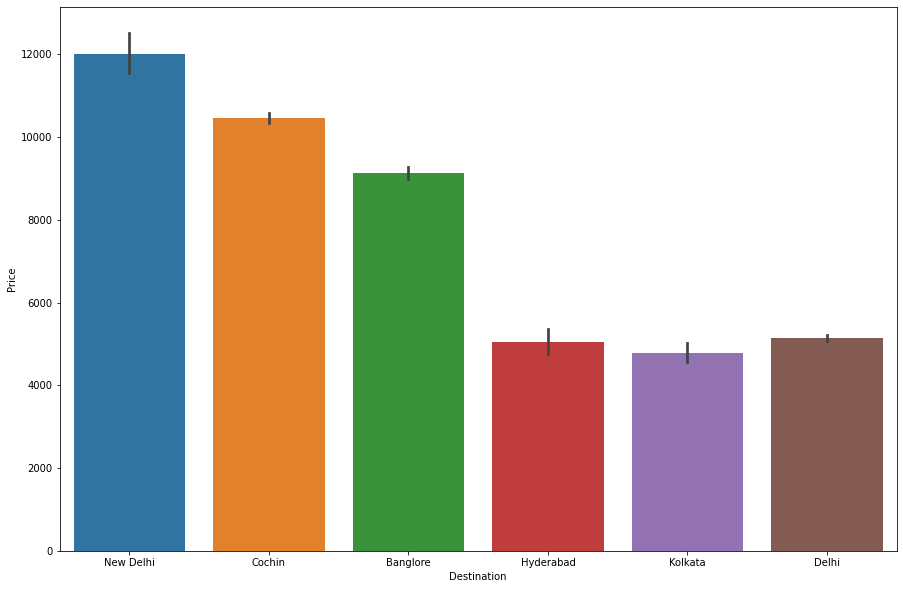

In [35]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'Price', x='Destination', data = df.sort_values('Price', ascending = False))
plt.show()

In [36]:
df['Destination'].value_counts() 

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# Delhi and New Delhi are the same 
df['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [38]:
df['Destination'].value_counts() 

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

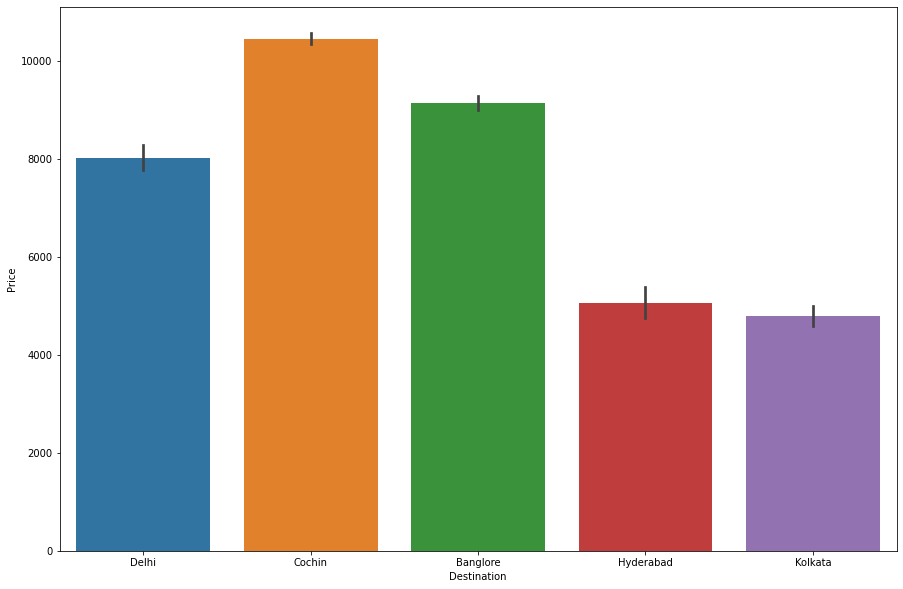

In [39]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'Price', x='Destination', data = df.sort_values('Price', ascending = False))
plt.show()

**Onehot Encoding on the categorical variables**

In [40]:
print(df['Source'].value_counts(), '\n\n')
print(df['Destination'].value_counts(), '\n\n')
print(df['Airline'].value_counts())

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64 


Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [41]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3,'4 stops': 4})

In [42]:
air_dummy = pd.get_dummies(df['Airline'], drop_first = True)

In [43]:
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)

In [44]:
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [45]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [46]:
df.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,3897,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,7662,5,1,2019,5,50,13,15,7,25


In [47]:
df.shape

(10462, 32)

**Correlation between features**

In [48]:
#df.drop(['Year_of_Journey'], axis =1, inplace = True) # it is everywhere 2019

<AxesSubplot:>

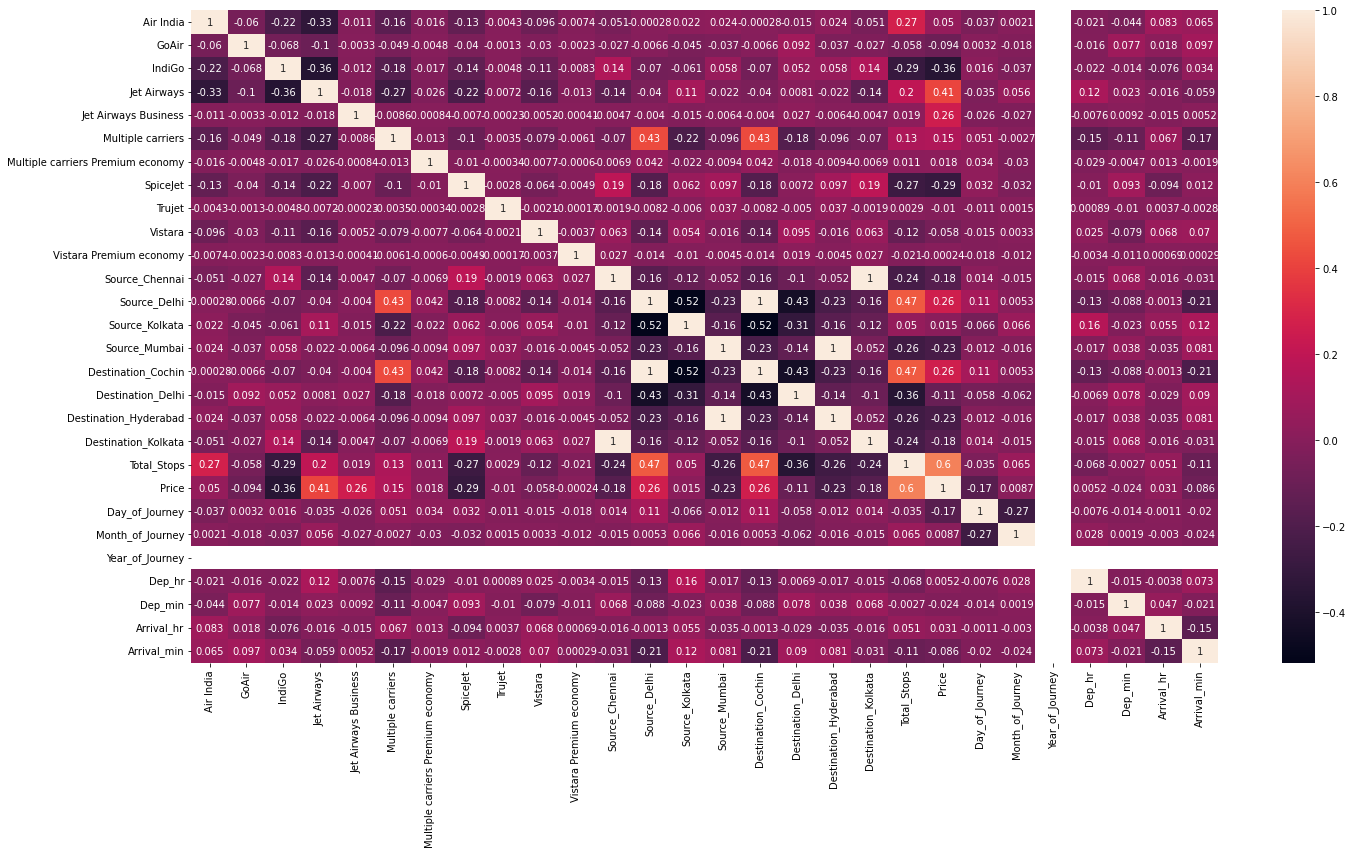

In [49]:
plt.figure(figsize = (23,12))
sns.heatmap(df.corr(), annot = True)

We don't see high correlation between the features, so we avoid Multicollinearity

## Test Data

In [50]:
df_test = pd.read_excel('data_test.xlsx')

In [51]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [52]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [53]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10462, 32)
test_shape (2671, 28)


In [54]:
x = df.drop(['Route', 'Price', 'Additional_Info'], axis = 1)
y = df['Price']

In [55]:
x.shape

(10462, 29)

## Model Building and Hyperparameter Tuning

In [56]:
# splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

### ExtraTreesRegressor

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

et_model = ExtraTreesRegressor(n_estimators=120)
et_model.fit(x_train,y_train)
y_pred = et_model.predict(x_test)

print(r2_score(y_test, y_pred))

0.7989910356071024


**Random Forest**

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred= rf_model.predict(x_test)

print(r2_score(y_test, y_pred))

0.8366691325316388


**Feature Importance**

<AxesSubplot:>

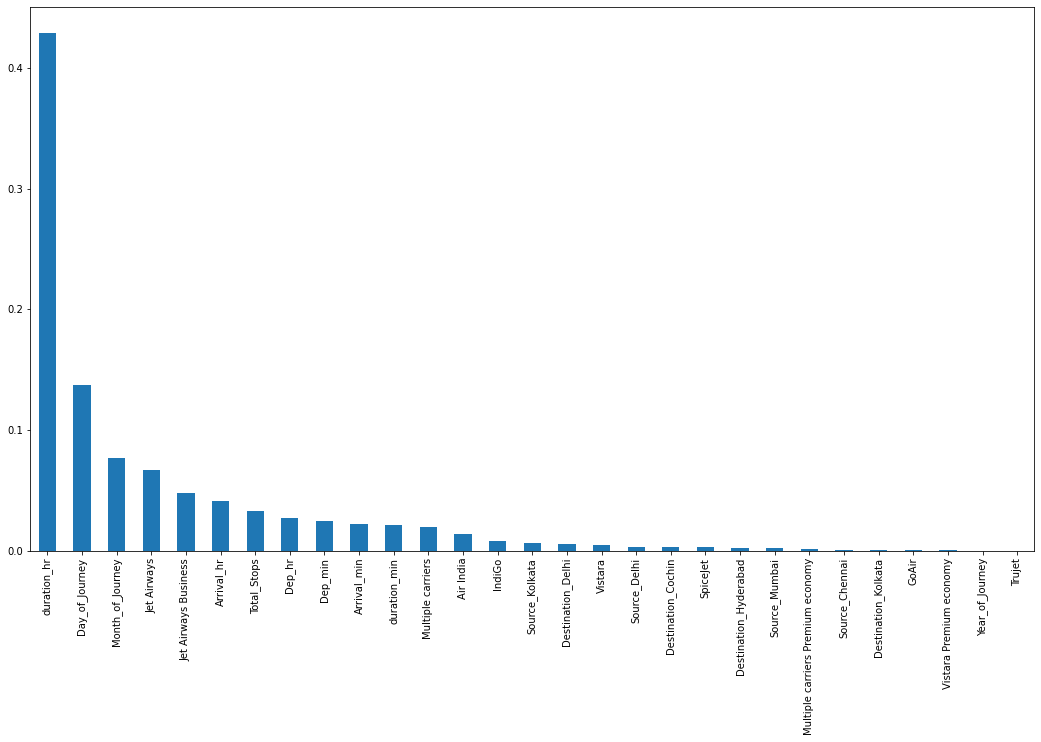

In [59]:
pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

**Hyperparameter tuning**

In [60]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6,45, num=5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

#creating random grid

rand_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rCV = RandomizedSearchCV(estimator=rf, param_distributions=rand_grid, scoring = 'neg_mean_squared_error',
                        n_iter = 10, cv = 3, random_state=10, n_jobs = 1)

In [ ]:
rCV.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf_pred = rCV.predict(x_test)
print('MAE', mean_absolute_error(y_test, rf_pred))
print('MSE', mean_squared_error(y_test, rf_pred))
print('R2 score:', r2_score(y_test, rf_pred))